In [1]:
 # regression -> if target variable is  numerical (123,3456,5678,543,..)
  #clssification if target vaiable (0 or 1 , cat or dog , ..)  

In [2]:
pwd

'C:\\Users\\svneh\\OneDrive\\Desktop\\py jup'

## Importing necessary libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('50_Startups.csv')

In [6]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [7]:
df.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [8]:
df.size

250

In [9]:
df.shape

(50, 5)

In [21]:
df.describe(include = 'all')

,R&D Spend,Administration,Marketing Spend,State,Profit
count,50.000000,50.000000,50.000000,50,50.000000
unique,NaN,NaN,NaN,3,NaN
top,NaN,NaN,NaN,New York,NaN
freq,NaN,NaN,NaN,17,NaN
mean,73721.615600,121344.639600,211025.097800,NaN,112012.639200
std,45902.256482,28017.802755,122290.310726,NaN,40306.180338
min,0.000000,51283.140000,0.000000,NaN,14681.400000
25%,39936.370000,103730.875000,129300.132500,NaN,90138.902500
50%,73051.080000,122699.795000,212716.240000,NaN,107978.190000
75%,101602.800000,144842.180000,299469.085000,NaN,139765.977500


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [13]:
for column in df.columns:
    print(column)

R&D Spend
Administration
Marketing Spend
State
Profit


In [14]:
df.nunique()

R&D Spend          49
Administration     50
Marketing Spend    48
State               3
Profit             50
dtype: int64

In [15]:
df.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [17]:
df.State.unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [22]:
df.isnull().any()

R&D Spend          False
Administration     False
Marketing Spend    False
State              False
Profit             False
dtype: bool

In [23]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

<Axes: xlabel='State', ylabel='count'>

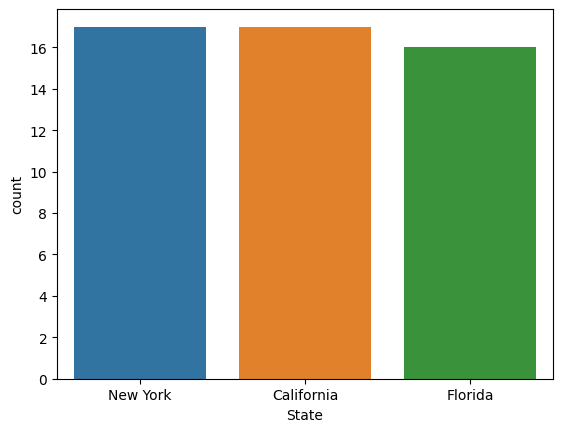

In [20]:
sns.countplot(x=df['State'],data=df)

<function matplotlib.pyplot.show(close=None, block=None)>

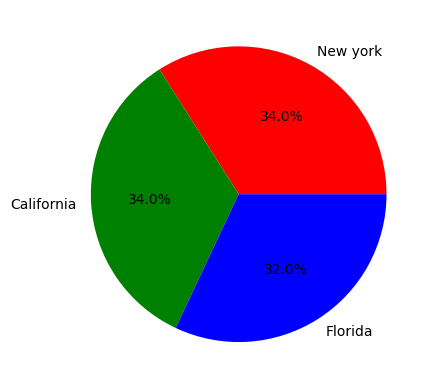

In [26]:
plt.pie(df['State'].value_counts(),colors = ['red','green','blue'],labels=['New york','California','Florida'],autopct = '%1.1f%%')
plt.show

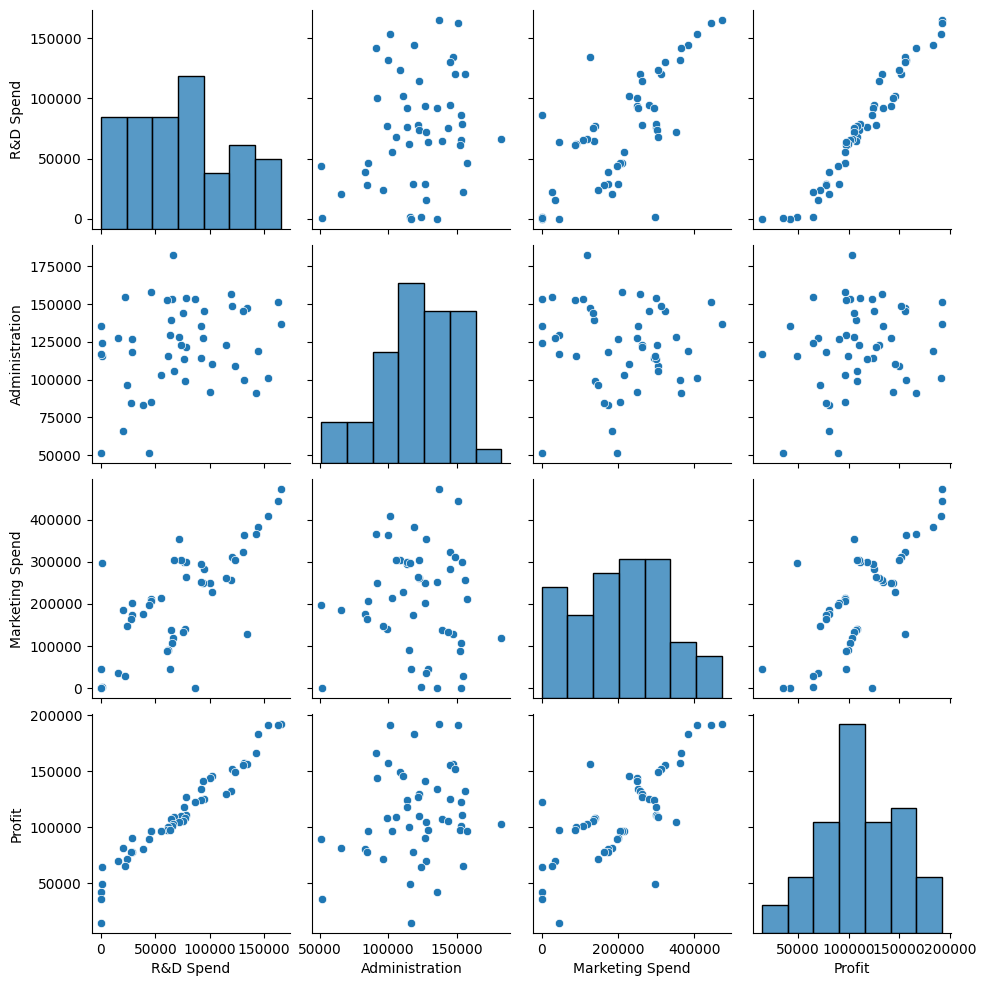

In [27]:
sns.pairplot(df)

In [28]:
df.corr()

C:\Users\svneh\AppData\Local\Temp\ipykernel_13436\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [29]:
import warnings
warnings.filterwarnings('ignore')

<Axes: >

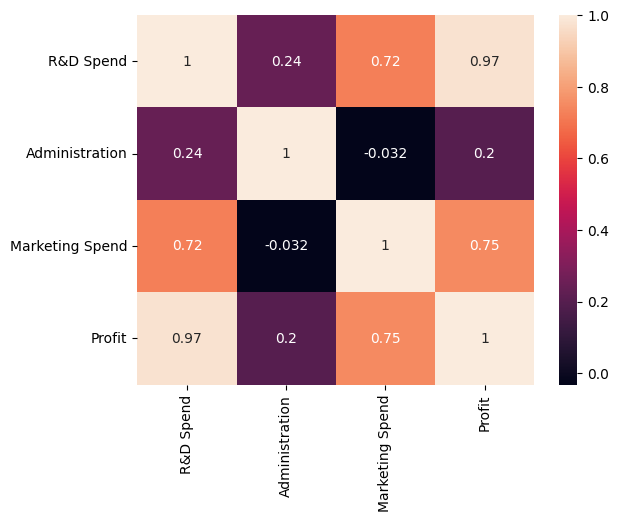

In [30]:
sns.heatmap(df.corr(),annot= True)

<Axes: >

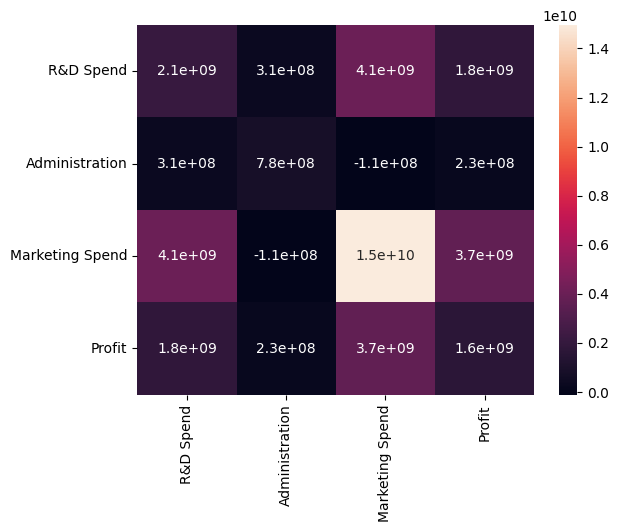

In [31]:
sns.heatmap(df.cov(),annot=True)

# popular encodings
One hot

label encoding

manual encoding

### using one hot encoding
Florida   New York       California

 0                  1                    0
 
0           0               1

1           0                0

 0          1              0
 
0           0               1

1           0                0
this is not the best type because it is difficult if there are 10 attributes it creates 10 columns 

so it will be difficult to preprocess all of this by system


### Label encoding
but here the machine will only allot the values based on alphabetical 
florida,New york ,california = 1,2,0

In [34]:
## Manual encoding = user will assign thee

In [35]:
from sklearn.preprocessing import LabelEncoder

In [36]:
le = LabelEncoder()
le.fit_transform(df['State'])

array([2, 0, 1, 2, 1, 2, 0, 1, 2, 0, 1, 0, 1, 0, 1, 2, 0, 2, 1, 2, 0, 2,
       1, 1, 2, 0, 1, 2, 1, 2, 1, 2, 0, 1, 0, 2, 1, 0, 2, 0, 0, 1, 0, 2,
       0, 2, 1, 0, 2, 0])

<Axes: >

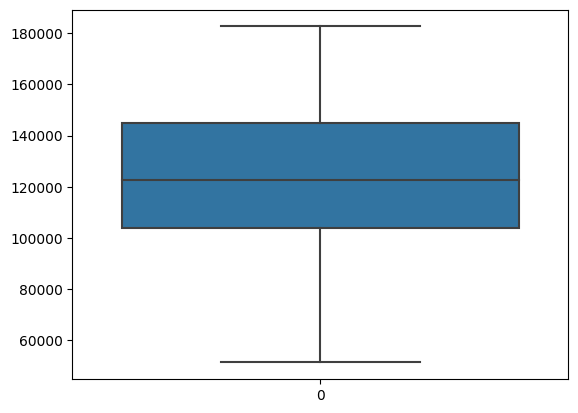

In [37]:
sns.boxplot(df['Administration'])

<Axes: >

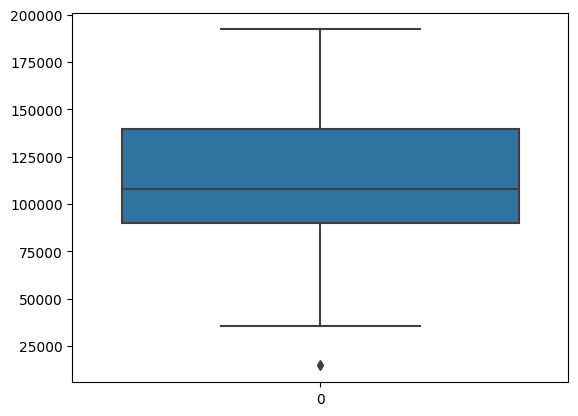

In [38]:
sns.boxplot(df['Profit'])

In [44]:
## first we have remove outliers then only we have to split the data

<Axes: >

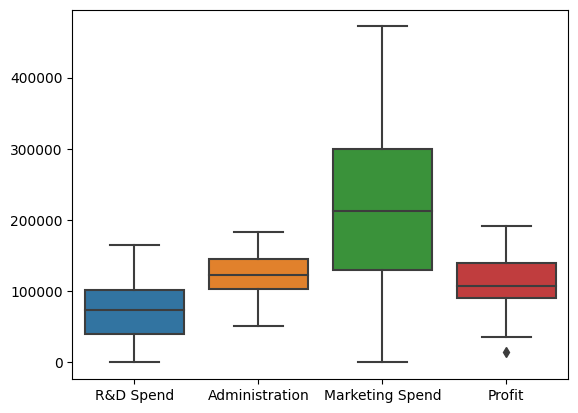

In [45]:
sns.boxplot(df)

In [51]:
x = df.drop('Profit',axis=1)
y = df['Profit']
    

In [53]:
x.head(2)

,R&D Spend,Administration,Marketing Spend,State
0,165349.2,136897.80,471784.10,New York
1,162597.7,151377.59,443898.53,California


In [54]:
y.head(2)

0    192261.83
1    191792.06
Name: Profit, dtype: float64

In [55]:
    from sklearn.preprocessing import LabelEncoder

In [56]:
le = LabelEncoder()
le.fit_transform(df['State'])

array([2, 0, 1, 2, 1, 2, 0, 1, 2, 0, 1, 0, 1, 0, 1, 2, 0, 2, 1, 2, 0, 2,
       1, 1, 2, 0, 1, 2, 1, 2, 1, 2, 0, 1, 0, 2, 1, 0, 2, 0, 0, 1, 0, 2,
       0, 2, 1, 0, 2, 0])

In [57]:
x.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [62]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=12)

In [65]:
x_train.shape

(40, 4)

In [66]:
x_train

,R&D Spend,Administration,Marketing Spend,State
17,94657.16,145077.58,282574.31,New York
38,20229.59,65947.93,185265.10,New York
37,44069.95,51283.14,197029.42,California
15,114523.61,122616.84,261776.23,New York
31,61136.38,152701.92,88218.23,New York
14,119943.24,156547.42,256512.92,Florida
26,75328.87,144135.98,134050.07,Florida
9,123334.88,108679.17,304981.62,California
33,55493.95,103057.49,214634.81,Florida
47,0.00,135426.92,0.00,California


In [67]:
x_test.shape

(10, 4)

In [69]:
x_train['State'] = le.fit_transform(x_train['State'])

In [70]:
x_train.head(5)

,R&D Spend,Administration,Marketing Spend,State
17,94657.16,145077.58,282574.31,2
38,20229.59,65947.93,185265.10,2
37,44069.95,51283.14,197029.42,0
15,114523.61,122616.84,261776.23,2
31,61136.38,152701.92,88218.23,2


In [77]:

x_train['State'] = le.fit_transform(x_train['State'])
x_train['State']

17    2
38    2
37    0
15    2
31    2
14    1
26    1
9     0
33    1
47    0
20    0
16    0
24    2
42    0
32    0
35    2
23    1
1     0
30    1
4     1
44    0
39    0
18    1
40    0
43    2
0     2
10    1
49    0
34    0
25    0
13    0
5     2
22    1
12    1
45    2
3     2
2     1
6     0
27    2
11    0
Name: State, dtype: int64

In [75]:
x_test.head()

,R&D Spend,Administration,Marketing Spend,State
28,66051.52,182645.56,118148.20,0
46,1315.46,115816.21,297114.46,0
7,130298.13,145530.06,323876.68,0
41,27892.92,84710.77,164470.71,0
36,28663.76,127056.21,201126.82,0


In [73]:
x_test

,R&D Spend,Administration,Marketing Spend,State
28,66051.52,182645.56,118148.20,0
46,1315.46,115816.21,297114.46,0
7,130298.13,145530.06,323876.68,0
41,27892.92,84710.77,164470.71,0
36,28663.76,127056.21,201126.82,0
29,65605.48,153032.06,107138.38,1
21,78389.47,153773.43,299737.29,1
48,542.05,51743.15,0.00,1
19,86419.70,153514.11,0.00,1
8,120542.52,148718.95,311613.29,1


In [78]:

x_test['State'] = le.transform(x_test['State'])
x_test['State']

28    0
46    0
7     0
41    0
36    0
29    1
21    1
48    1
19    1
8     1
Name: State, dtype: int64

In [79]:

# Build an ANN model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [80]:

# Initializing the seq model
reg_model = Sequential()
# Adding the input layer to the model
reg_model.add(Dense(4,activation='relu'))
# Adding the 1st hidden layer to the model
reg_model.add(Dense(64,activation='relu'))
# Adding the 2nd hidden layer to the model
reg_model.add(Dense(32,activation='relu'))
# Adding output layer
reg_model.add(Dense(1,activation='linear'))

In [81]:

# Compiling the skeleton with loss and gradient decent

reg_model.compile(optimizer='adam',loss='mse')

In [83]:

# Training the model

reg_model.fit(x_train,y_train,batch_size=4,epochs=10)

Epoch 1/10
10/10 [==============================] - 1s 4ms/step - loss: 14488974336.0000
Epoch 2/10
10/10 [==============================] - 0s 3ms/step - loss: 10281427968.0000
Epoch 3/10
10/10 [==============================] - 0s 3ms/step - loss: 6477653504.0000
Epoch 4/10
10/10 [==============================] - 0s 3ms/step - loss: 3400020736.0000
Epoch 5/10
10/10 [==============================] - 0s 3ms/step - loss: 1556431104.0000
Epoch 6/10
10/10 [==============================] - 0s 3ms/step - loss: 1028160896.0000
Epoch 7/10
10/10 [==============================] - 0s 3ms/step - loss: 1066239616.0000
Epoch 8/10
10/10 [==============================] - 0s 4ms/step - loss: 950518400.0000
Epoch 9/10
10/10 [==============================] - 0s 3ms/step - loss: 889114304.0000
Epoch 10/10
10/10 [==============================] - 0s 3ms/step - loss: 849561792.0000


In [85]:
reg_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (4, 4)                    20        
                                                                 
 dense_1 (Dense)             (4, 64)                   320       
                                                                 
 dense_2 (Dense)             (4, 32)                   2080      
                                                                 
 dense_3 (Dense)             (4, 1)                    33        
                                                                 
Total params: 2,453
Trainable params: 2,453
Non-trainable params: 0
_________________________________________________________________


In [86]:
y_pred = reg_model.predict(x_test)

1/1 [==============================] - 0s 184ms/step


In [89]:
comp = pd.DataFrame(y_test)
comp.columns = ['Actual Value']
comp['Predicted values'] = y_pred
comp

,Actual Value,Predicted values
28,103282.38,122054.898438
46,49490.75,157610.171875
7,155752.60,145683.500000
41,77798.83,89685.320312
36,90708.19,124064.429688
29,101004.64,102350.914062
21,111313.02,156036.828125
48,35673.41,29080.273438
19,122776.86,80367.007812
8,152211.77,146231.031250
